In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
import read_reports as rr
import os
import Differentiated_Body_Composition_Tracker as dbct
import matplotlib.patches as mpatches

sol_to_earth = 332946.078
m_pl = 2.793176e-08 * sol_to_earth
m_emb = 2.793176e-07 * sol_to_earth
min_frag_mass = 0.5 * m_pl

--- 0.15225625038146973 seconds ---


In [2]:
#extract Anna Childs sample output data
anna_t_type, anna_n = rr.extract_data_outfile('/home/tajer.1/rebound/examples/data/Anna.out')
anna_old_v, anna_old_b = rr.extract_data_impact('/home/tajer.1/rebound/examples/data/Anna.out')
anna_df = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/data/Anna.out')

anna_new_df = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/childs_eg/slurm-8196365.out')
anna_new_n = rr.read_num_bodies('/home/tajer.1/rebound/examples/childs_eg/slurm-8196365.out')

In [3]:
#sample .out file path: /home/tajer.1/rebound/examples/han_1/slurm-8186879.out
#code below opens every folder with base path and reads the .out file, then saves data into the related dataframe

h_df_1 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/han_1/slurm-8186879.out')
h_df_2 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/han_2/slurm-8186880.out')
h_df_3 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/han_3/slurm-8186881.out')
h_df_4 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/han_4/slurm-8186882.out')
h_df_5 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/han_5/slurm-8186883.out')
h_df_6 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/han_6/slurm-8186884.out')
h_df_7 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/han_7/slurm-8186885.out')
h_df_8 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/han_8/slurm-8186886.out')
h_df_9 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/han_9/slurm-8186887.out')
h_df_10 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/han_10/slurm-8186888.out')

In [4]:
#read the dbct output files

h_dbct_1 = rr.read_dbct_output('/home/tajer.1/planetgarten/DBCT/haniyeh_output/han_output_1.txt')
h_dbct_2 = rr.read_dbct_output('/home/tajer.1/planetgarten/DBCT/haniyeh_output/han_output_2.txt')
h_dbct_3 = rr.read_dbct_output('/home/tajer.1/planetgarten/DBCT/haniyeh_output/han_output_3.txt')
h_dbct_4 = rr.read_dbct_output('/home/tajer.1/planetgarten/DBCT/haniyeh_output/han_output_4.txt')
h_dbct_5 = rr.read_dbct_output('/home/tajer.1/planetgarten/DBCT/haniyeh_output/han_output_5.txt')
h_dbct_6 = rr.read_dbct_output('/home/tajer.1/planetgarten/DBCT/haniyeh_output/han_output_6.txt')
h_dbct_7 = rr.read_dbct_output('/home/tajer.1/planetgarten/DBCT/haniyeh_output/han_output_7.txt')

# CMF of final bodies versus their mass

Results from 7 different runs, all with expansion factor (ef) = 5

Minimum fragment mass is set as 0.5 mass of planetesimal (m_pl)

<div style="text-align: center;">
    <img src="/home/tajer.1/planetgarten/simulation_results/images/ferich1.png" alt="Simulation Result" style="max-width: 100%; height: auto;">
    <p><em>Figure 4 in Ferich et al. (2024) </em></p>
</div>


Text(0.5, 1.0, 'time point = 9.93e+06')

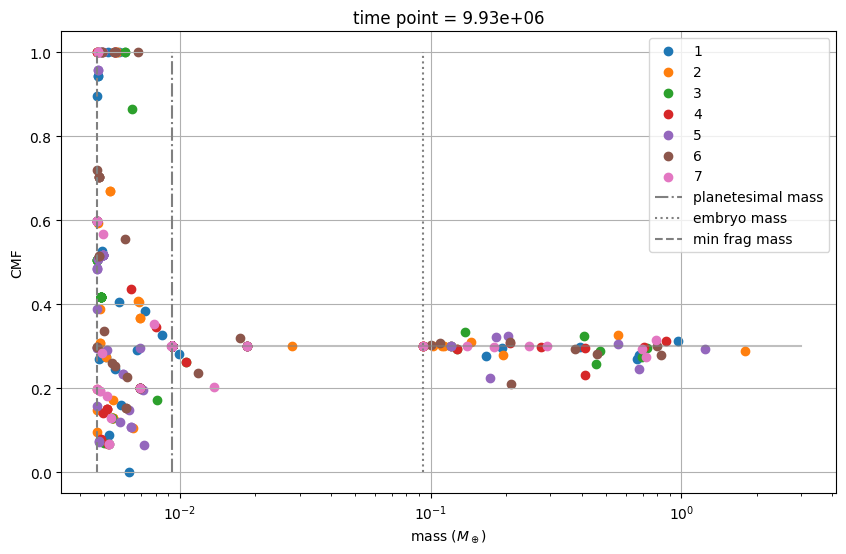

In [5]:
#CMF versus body mass plot

plt.figure(figsize=(10,6))

plt.scatter(h_dbct_1['mass'] * sol_to_earth, h_dbct_1['cmf'], label = '1')
plt.scatter(h_dbct_2['mass'] * sol_to_earth, h_dbct_2['cmf'], label = '2')
plt.scatter(h_dbct_3['mass'] * sol_to_earth, h_dbct_3['cmf'], label = '3')
plt.scatter(h_dbct_4['mass'] * sol_to_earth, h_dbct_4['cmf'], label = '4')
plt.scatter(h_dbct_5['mass'] * sol_to_earth, h_dbct_5['cmf'], label = '5')
plt.scatter(h_dbct_6['mass'] * sol_to_earth, h_dbct_6['cmf'], label = '6')
plt.scatter(h_dbct_7['mass'] * sol_to_earth, h_dbct_7['cmf'], label = '7')

plt.plot([min_frag_mass, 3], [0.3 , 0.3], ls = 'solid', alpha = 0.5,  color='grey')
plt.plot([m_pl, m_pl], [0, 1], ls = '-.', color='grey', label = 'planetesimal mass')
plt.plot([m_emb, m_emb], [0, 1], ls = 'dotted', color='grey', label = 'embryo mass')
plt.plot([min_frag_mass, min_frag_mass], [0, 1], ls = '--', color='grey', label = 'min frag mass')

plt.legend()
plt.xlabel(r'mass ($M_\oplus$)')
plt.ylabel('CMF')
plt.grid(True)
plt.xscale('log')
time_point = np.max(h_df_1['time'])
plt.title(f'time point = {time_point:.2e}')

# Vi/Vesc of bodies versus target mass

Results from 7 different runs, all with expansion factor (ef) = 5

Minimum fragment mass is set as 0.5 mass of planetesimal (m_pl)

<div style="text-align: center;">
    <img src="/home/tajer.1/planetgarten/simulation_results/images/fer2.png" alt="Simulation Result" style="max-width: 100%; height: auto;">
    <p><em>Figure 6 in Ferich et al. (2024) </em></p>
</div>


In [6]:
h_df_1['type'].unique()

array(['EFFECTIVELY MERGED', 'GRAZE AND MERGE', 'ELASTIC BOUNCE',
       'SIMPLY MERGED', 'PARTIAL ACCRETION', 'SUPER-CATASTROPHIC',
       'GRAZING PARTIAL EROSION', 'PARTIAL EROSION'], dtype=object)

In [7]:
#filtering accretion and erosions
def find_acc(df):
    df_acc = df[(df['type'] == 'PARTIAL ACCRETION') | (df['type'] == 'HIT AND RUN')]
    return df_acc

def find_ero(df):
    def_ero = df[(df['type'] == 'GRAZING PARTIAL EROSION') | (df['type'] == 'SUPER-CATASTROPHIC') | (df['type'] == 'PARTIAL EROSION')]
    return def_ero


acc_h_all = pd.concat([find_acc(h_df_1),
                       find_acc(h_df_2),
                       find_acc(h_df_3),
                       find_acc(h_df_4),
                       find_acc(h_df_5),
                       find_acc(h_df_6),
                       find_acc(h_df_7),
                       ])

ero_h_all = pd.concat([find_ero(h_df_1),
                       find_ero(h_df_2),
                       find_ero(h_df_3),
                       find_ero(h_df_4),
                       find_ero(h_df_5),
                       find_ero(h_df_6),
                       find_ero(h_df_7),                      
                        ])

Text(0.5, 1.0, 'time point = 9.93e+06')

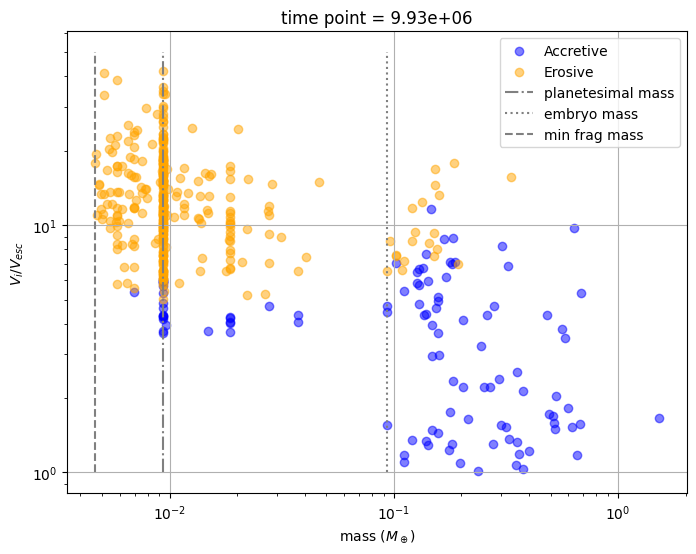

In [8]:
plt.figure(figsize=(8,6))

plt.scatter(pd.to_numeric(acc_h_all['Mt']) * sol_to_earth, acc_h_all['Vimp/Vesc'], color = 'blue', label = 'Accretive', alpha=0.5)
plt.scatter(pd.to_numeric(ero_h_all['Mt']) * sol_to_earth, ero_h_all['Vimp/Vesc'], color = 'orange', label = 'Erosive', alpha=0.5)

plt.plot([m_pl, m_pl], [1, 50], ls = '-.', color='grey', label = 'planetesimal mass')
plt.plot([m_emb, m_emb], [1, 50], ls = 'dotted', color='grey', label = 'embryo mass')
plt.plot([min_frag_mass, min_frag_mass], [1, 50], ls = '--', color='grey', label = 'min frag mass')

plt.legend()
plt.xlabel(r'mass ($M_\oplus$)')
plt.ylabel(r'$V_{i}/V_{esc}$')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
time_point = np.max(h_df_1['time'])
plt.title(f'time point = {time_point:.2e}')

# Comparing Fragmentation results with Anna's output file

Results from 10 different runs, all with expansion factor (ef) = 5

Minimum fragment mass is set as 0.5 mass of planetesimal (m_pl)

In [9]:
ht1, h_n_1 = rr.extract_data_outfile('/home/tajer.1/rebound/examples/han_1/slurm-8186879.out')
ht2, h_n_2 = rr.extract_data_outfile('/home/tajer.1/rebound/examples/han_2/slurm-8186880.out')
ht3, h_n_3 = rr.extract_data_outfile('/home/tajer.1/rebound/examples/han_3/slurm-8186881.out')
ht4, h_n_4 = rr.extract_data_outfile('/home/tajer.1/rebound/examples/han_4/slurm-8186882.out')
ht5, h_n_5 = rr.extract_data_outfile('/home/tajer.1/rebound/examples/han_5/slurm-8186883.out')
ht6, h_n_6 = rr.extract_data_outfile('/home/tajer.1/rebound/examples/han_6/slurm-8186884.out')
ht7, h_n_7 = rr.extract_data_outfile('/home/tajer.1/rebound/examples/han_7/slurm-8186885.out')
ht8, h_n_8 = rr.extract_data_outfile('/home/tajer.1/rebound/examples/han_8/slurm-8186886.out')
ht9, h_n_9 = rr.extract_data_outfile('/home/tajer.1/rebound/examples/han_9/slurm-8186887.out')
ht10, h_n_10 = rr.extract_data_outfile('/home/tajer.1/rebound/examples/han_10/slurm-8186888.out')

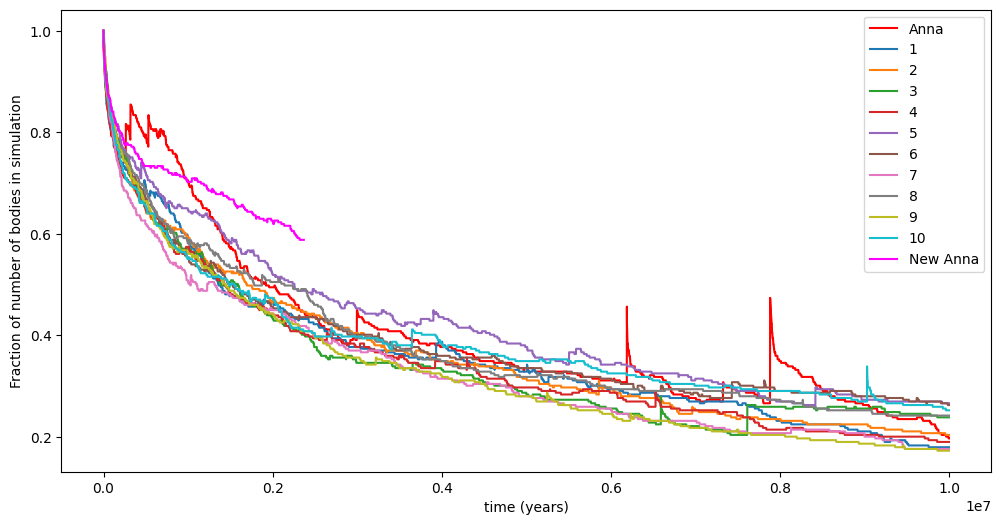

In [10]:
n_0 = 26+260+3 #embryos, pls, sun, saturn, jupiter

plt.figure(figsize=(12,6))

plt.plot(anna_n['t'], anna_n['n_bodies']/n_0, label = 'Anna', color = 'red')
plt.plot(h_n_1['t'], h_n_1['n_bodies']/n_0, label = 1)
plt.plot(h_n_2['t'], h_n_2['n_bodies']/n_0, label = 2)
plt.plot(h_n_3['t'], h_n_3['n_bodies']/n_0, label = 3)
plt.plot(h_n_4['t'], h_n_4['n_bodies']/n_0, label = 4)
plt.plot(h_n_5['t'], h_n_5['n_bodies']/n_0, label = 5)
plt.plot(h_n_6['t'], h_n_6['n_bodies']/n_0, label = 6)
plt.plot(h_n_7['t'], h_n_7['n_bodies']/n_0, label = 7)
plt.plot(h_n_8['t'], h_n_8['n_bodies']/n_0, label = 8)
plt.plot(h_n_9['t'], h_n_9['n_bodies']/n_0, label = 9)
plt.plot(h_n_10['t'], h_n_10['n_bodies']/n_0, label = 10)
plt.plot(anna_new_n['t'], anna_new_n['n_bodies']/n_0, label = 'New Anna', color = 'magenta')

plt.xlabel('time (years)')
plt.ylabel('Fraction of number of bodies in simulation')

plt.legend()

In [11]:
v_list = pd.concat([h_df_1['Vimp/Vesc'],
                    h_df_2['Vimp/Vesc'],
                    h_df_3['Vimp/Vesc'],
                    h_df_4['Vimp/Vesc'],
                    h_df_5['Vimp/Vesc'],
                    h_df_6['Vimp/Vesc'],
                    h_df_7['Vimp/Vesc'],
                    h_df_8['Vimp/Vesc'],
                    h_df_9['Vimp/Vesc'],
                    h_df_10['Vimp/Vesc'],
                    ], axis=0)
b_list = pd.concat([h_df_1['b/Rt'],
                    h_df_2['b/Rt'],
                    h_df_3['b/Rt'],
                    h_df_4['b/Rt'],
                    h_df_5['b/Rt'],
                    h_df_6['b/Rt'],
                    h_df_7['b/Rt'],
                    h_df_8['b/Rt'],
                    h_df_9['b/Rt'],
                    h_df_10['b/Rt'],
                    ], axis=0)

v_list = pd.to_numeric(v_list)
b_list = pd.to_numeric(b_list)

<Figure size 640x480 with 0 Axes>

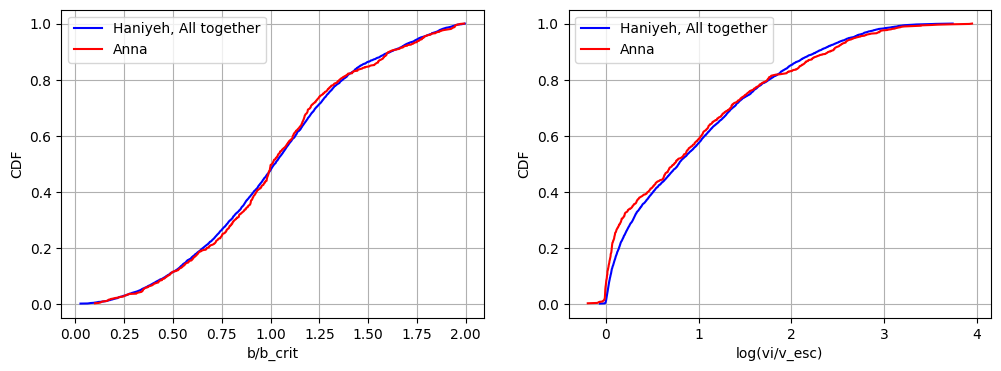

In [ ]:
#CDF functions
plt.clf()
df_b = []
cdf_b = []
df_v = []
cdf_v = []

df_h_b, cdf_h_b = rr.make_cdf(b_list)
df_h_v, cdf_h_v = rr.make_cdf(v_list)

anna_df_b, anna_cdf_b = rr.make_cdf(anna_old_b)
anna_df_v, anna_cdf_v = rr.make_cdf(anna_old_v)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
#for i in range(0,10):
plt.plot(df_h_b, cdf_h_b, color = 'blue', label = 'Haniyeh, All together')
plt.plot(anna_df_b, anna_cdf_b, label = 'Anna', color='red')
plt.grid(True)
plt.xlabel('b/b_crit')
plt.ylabel('CDF')
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 1st subplot

#for i in range(0,10):
plt.plot(np.log(df_h_v), cdf_h_v, color = 'blue', label='Haniyeh, All together')

plt.plot(np.log(anna_df_v), anna_cdf_v, label = 'Anna', color='red')
plt.grid(True)
plt.xlabel('log(vi/v_esc)')
plt.ylabel('CDF')
plt.legend()


plt.show()

In [13]:
#b/b_crit
data1 = anna_old_b
data2 = b_list

# Call the function
result = rr.perform_ks_test(data1, data2)

# Display the result
print("b/bcrit tests:")
print("K-S Statistic:", result["statistic"])
print("P-value:", result["p_value"])
print("Conclusion:", result["conclusion"])

b/bcrit tests:
K-S Statistic: 0.03071780436312456
P-value: 0.539814810164467
Conclusion: Fail to reject H0: No significant difference in the datasets.


In [14]:
#vi/vesc
data1 = anna_old_v
data2 = v_list

# Call the function
result = rr.perform_ks_test(data1, data2)

# Display the result
print("vi/vesc tests:")
print("K-S Statistic:", result["statistic"])
print("P-value:", result["p_value"])
print("Conclusion:", result["conclusion"])

vi/vesc tests:
K-S Statistic: 0.09179275158339198
P-value: 2.2708599535462993e-05
Conclusion: Reject H0: The datasets are significantly different.


In [15]:
#This function reads .out files, and extracts collision times, collision types, and number of bodies versus time
def extract_data_outfile(file_path):
    """
    Extracts collision time, types, and t versus number of bodies in simulation from the output file.
    Returns two pandas dataframes:
    1. t_type: with columns ['coll_times', 'coll_types']
    2. t_n: with columns ['t', 'n_bodies']
    """
    coll_time = []
    coll_types = []
    n_bodies_list = []
    
    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the line contains the desired phrase
            if "TIME OF COLLISION:" in line:
                # Extract the value after "TIME OF COLLISION:"
                time_value = float(line.split(":")[1].strip())
                coll_time.append(time_value)
            
            if "COLLISION TYPE:" in line:
                # Extract the value after "COLLISION TYPE:"
                type_value = line.split(":")[1].strip()
                coll_types.append(type_value)
                
            if "N_tot=" in line and "t=" in line:
                # Extract N_tot and time values
                parts = line.split()
                n_bodies = int(parts[1])  # Extract the value after "N_tot="
                t = int(float(parts[3]))  # Extract the time value and convert to integer
                # Append the (t, n_bodies) as a tuple to the list
                n_bodies_list.append((t, n_bodies))
                
    # Convert lists to numpy arrays for structured data
    n_bodies = np.array(n_bodies_list, dtype=[('t', 'i4'), ('n_bodies', 'i4')])
    
    # Create pandas DataFrame for collision time and types
    t_type = pd.DataFrame({
        'coll_times': coll_time,
        'coll_types': coll_types
    })
    
    # Create pandas DataFrame for n_bodies (t and n_bodies)
    t_n = pd.DataFrame(n_bodies)
    
    return t_type, t_n

# New runs by Anna Childs 

In [16]:
childs_1 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound1.out')
childs_2 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound2.out')
childs_3 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound3.out')
childs_4 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound4.out')
childs_5 = rr.extract_data_outfile_full('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound5.out')

childs_n_1 = rr.read_num_bodies('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound1.out')
childs_n_2 = rr.read_num_bodies('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound2.out')
childs_n_3 = rr.read_num_bodies('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound3.out')
childs_n_4 = rr.read_num_bodies('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound4.out')
childs_n_5 = rr.read_num_bodies('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound5.out')
childs_n_6 = rr.read_num_bodies('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound6.out')
childs_n_7 = rr.read_num_bodies('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound7.out')
childs_n_8 = rr.read_num_bodies('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound8.out')
childs_n_9 = rr.read_num_bodies('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound9.out')
childs_n_10 = rr.read_num_bodies('/home/tajer.1/rebound/examples/data/new_frag_old_disk_output/rebound10.out')

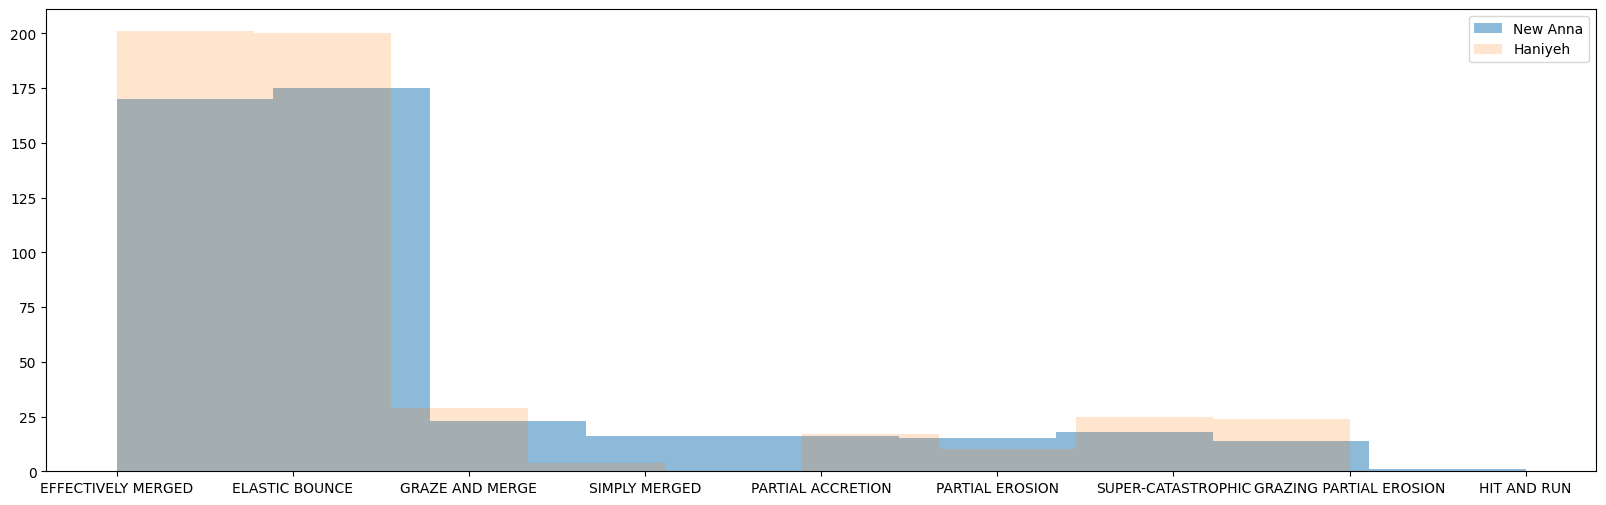

In [17]:
plt.figure(figsize=(20,6))
plt.hist(childs_1['type'], label = 'New Anna', alpha = 0.5, bins = 9)
plt.hist(h_df_1['type'], alpha=0.2, label = 'Haniyeh', bins = 9)

plt.legend()

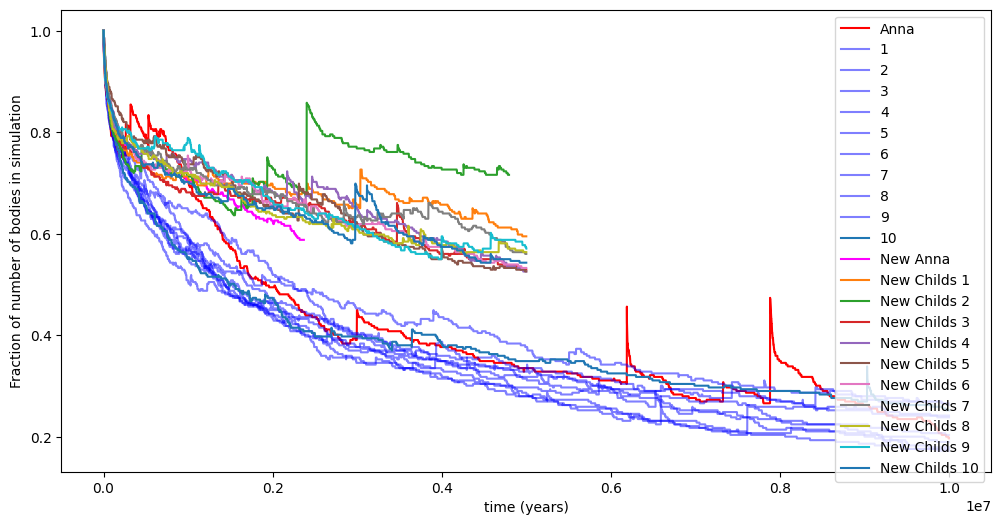

In [ ]:
n_0 = 26+260+3 #embryos, pls, sun, saturn, jupiter

plt.figure(figsize=(12,6))

plt.plot(anna_n['t'], anna_n['n_bodies']/n_0, label = 'Anna', color = 'red')
plt.plot(h_n_1['t'], h_n_1['n_bodies']/n_0, label = 1, color = 'blue', alpha=0.5)
plt.plot(h_n_2['t'], h_n_2['n_bodies']/n_0, label = 2, color = 'blue', alpha=0.5)
plt.plot(h_n_3['t'], h_n_3['n_bodies']/n_0, label = 3, color = 'blue', alpha=0.5)
plt.plot(h_n_4['t'], h_n_4['n_bodies']/n_0, label = 4, color = 'blue', alpha=0.5)
plt.plot(h_n_5['t'], h_n_5['n_bodies']/n_0, label = 5, color = 'blue', alpha=0.5)
plt.plot(h_n_6['t'], h_n_6['n_bodies']/n_0, label = 6, color = 'blue', alpha=0.5)
plt.plot(h_n_7['t'], h_n_7['n_bodies']/n_0, label = 7, color = 'blue', alpha=0.5)
plt.plot(h_n_8['t'], h_n_8['n_bodies']/n_0, label = 8, color = 'blue', alpha=0.5)
plt.plot(h_n_9['t'], h_n_9['n_bodies']/n_0, label = 9, color = 'blue', alpha=0.5)
plt.plot(h_n_10['t'], h_n_10['n_bodies']/n_0, label = 10, color = 'blue', alpha = 0.5)
plt.plot(anna_new_n['t'], anna_new_n['n_bodies']/n_0, label = 'New Anna', color = 'magenta')

plt.plot(childs_n_1['t'], childs_n_1['n_bodies']/n_0, label = 'New Childs 1')
plt.plot(childs_n_2['t'], childs_n_2['n_bodies']/n_0, label = 'New Childs 2')
plt.plot(childs_n_3['t'], childs_n_3['n_bodies']/n_0, label = 'New Childs 3')
plt.plot(childs_n_4['t'], childs_n_4['n_bodies']/n_0, label = 'New Childs 4')
plt.plot(childs_n_5['t'], childs_n_5['n_bodies']/n_0, label = 'New Childs 5')
plt.plot(childs_n_6['t'], childs_n_6['n_bodies']/n_0, label = 'New Childs 6')
plt.plot(childs_n_7['t'], childs_n_7['n_bodies']/n_0, label = 'New Childs 7')
plt.plot(childs_n_8['t'], childs_n_8['n_bodies']/n_0, label = 'New Childs 8')
plt.plot(childs_n_9['t'], childs_n_9['n_bodies']/n_0, label = 'New Childs 9')
plt.plot(childs_n_10['t'], childs_n_10['n_bodies']/n_0, label = 'New Childs 10')

plt.xlabel('time (years)')
plt.ylabel('Fraction of number of bodies in simulation')

plt.legend()

In [19]:
ones_count = (childs_1 == 'ELASTIC BOUNCE').sum().sum()

In [20]:
bounce_count_childs = np.zeros(10)
bounce_count_honey = np.zeros(10)

bounce_count_childs[0] = (childs_1 == 'ELASTIC BOUNCE').sum().sum()
bounce_count_childs[1] = (childs_2 == 'ELASTIC BOUNCE').sum().sum()
bounce_count_childs[2] = (childs_3 == 'ELASTIC BOUNCE').sum().sum()
bounce_count_childs[3] = (childs_4 == 'ELASTIC BOUNCE').sum().sum()
bounce_count_childs[4] = (childs_5 == 'ELASTIC BOUNCE').sum().sum()

bounce_count_honey[0] = (h_df_1 == 'ELASTIC BOUNCE').sum().sum()
bounce_count_honey[1] = (h_df_2 == 'ELASTIC BOUNCE').sum().sum()
bounce_count_honey[2] = (h_df_3 == 'ELASTIC BOUNCE').sum().sum()
bounce_count_honey[3] = (h_df_4 == 'ELASTIC BOUNCE').sum().sum()
bounce_count_honey[4] = (h_df_5 == 'ELASTIC BOUNCE').sum().sum()


In [21]:
bounce_count_childs

array([175., 211., 187., 233., 214.,   0.,   0.,   0.,   0.,   0.])

In [22]:
bounce_count_honey

array([200., 229., 168., 195., 243.,   0.,   0.,   0.,   0.,   0.])

Text(0.5, 1.0, 'time point = 9.93e+06')

<Figure size 640x480 with 0 Axes>

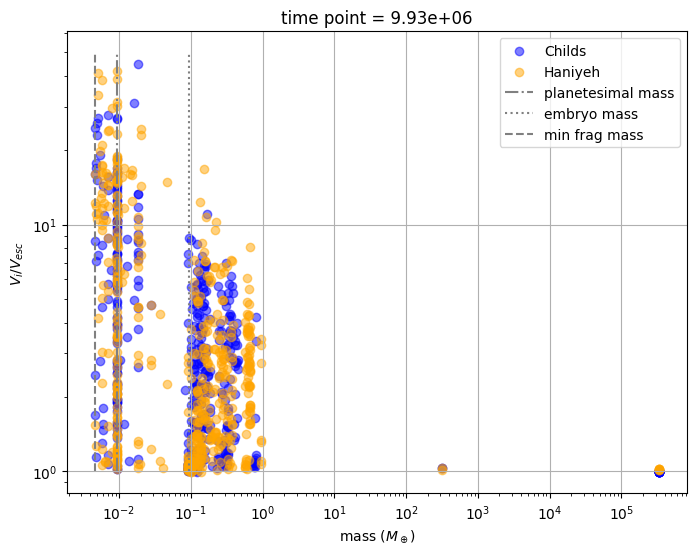

In [23]:
plt.clf()

plt.figure(figsize=(8,6))

plt.scatter(pd.to_numeric(childs_1['Mt']) * sol_to_earth, childs_1['Vimp/Vesc'], color = 'blue', label = 'Childs', alpha=0.5)
plt.scatter(pd.to_numeric(h_df_1['Mt']) * sol_to_earth, h_df_1['Vimp/Vesc'], color = 'orange', label = 'Haniyeh', alpha=0.5)

plt.plot([m_pl, m_pl], [1, 50], ls = '-.', color='grey', label = 'planetesimal mass')
plt.plot([m_emb, m_emb], [1, 50], ls = 'dotted', color='grey', label = 'embryo mass')
plt.plot([min_frag_mass, min_frag_mass], [1, 50], ls = '--', color='grey', label = 'min frag mass')

plt.legend()
plt.xlabel(r'mass ($M_\oplus$)')
plt.ylabel(r'$V_{i}/V_{esc}$')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
time_point = np.max(h_df_1['time'])
plt.title(f'time point = {time_point:.2e}')

Text(0.5, 1.0, 'time point = 9.93e+06')

<Figure size 640x480 with 0 Axes>

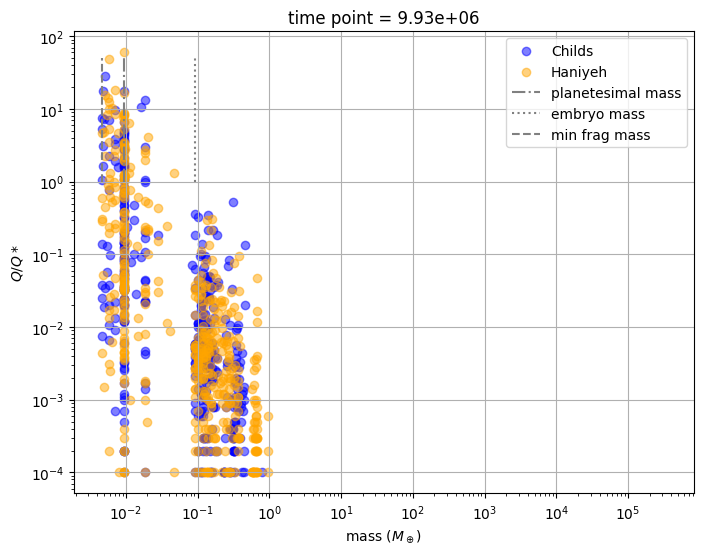

In [24]:
plt.clf()

plt.figure(figsize=(8,6))

plt.scatter(pd.to_numeric(childs_1['Mt']) * sol_to_earth, childs_1['Q/Q*'], color = 'blue', label = 'Childs', alpha=0.5)
plt.scatter(pd.to_numeric(h_df_1['Mt']) * sol_to_earth, h_df_1['Q/Q*'], color = 'orange', label = 'Haniyeh', alpha=0.5)

plt.plot([m_pl, m_pl], [1, 50], ls = '-.', color='grey', label = 'planetesimal mass')
plt.plot([m_emb, m_emb], [1, 50], ls = 'dotted', color='grey', label = 'embryo mass')
plt.plot([min_frag_mass, min_frag_mass], [1, 50], ls = '--', color='grey', label = 'min frag mass')

plt.legend()
plt.xlabel(r'mass ($M_\oplus$)')
plt.ylabel(r'$Q/Q*$')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
time_point = np.max(h_df_1['time'])
plt.title(f'time point = {time_point:.2e}')

# Order of Jupiter and Saturn

In [29]:
#comparison of the two runs where in one order of jupiter and saturn is fine, and in one, it's not
#run1_order is the one where order of jup and saturn is fine
#run1 noorder is one where order is messed up
#run1 is Anna's original files
#badf is run1, but with my values for f

run1_order = rr.read_num_bodies('/home/tajer.1/rebound/examples/Run1_order/slurm-8196845.out')
run1_noorder = rr.read_num_bodies('/home/tajer.1/rebound/examples/Run1_my_jup/slurm-8196841.out')
run1 = rr.read_num_bodies('/home/tajer.1/rebound/examples/Run1/slurm-8196598.out')
badf = rr.read_num_bodies('/home/tajer.1/rebound/examples/Run1_my_f/slurm-8196843.out')

In [32]:
#now my setup files with fixed order of jupiter and saturn 
h1_ord = rr.read_num_bodies('/home/tajer.1/rebound/examples/han_1_order/slurm-8197571.out')
h2_ord = rr.read_num_bodies('/home/tajer.1/rebound/examples/han_2_order/slurm-8197572.out')
h3_ord = rr.read_num_bodies('/home/tajer.1/rebound/examples/han_3_order/slurm-8197574.out')

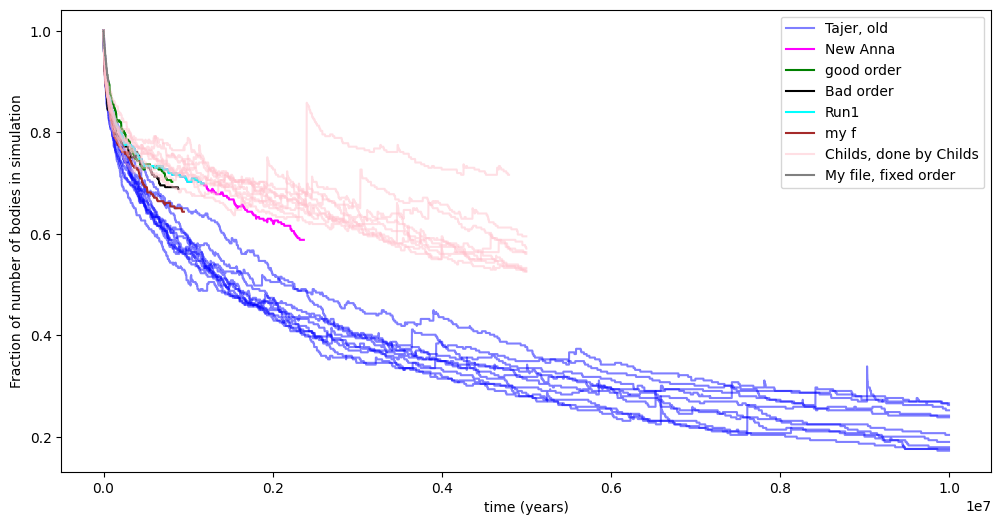

In [37]:
n_0 = 26+260+3 #embryos, pls, sun, saturn, jupiter

plt.figure(figsize=(12,6))

#plt.plot(anna_n['t'], anna_n['n_bodies']/n_0, label = 'Anna', color = 'red')
plt.plot(h_n_1['t'], h_n_1['n_bodies']/n_0, label = 'Tajer, old', color = 'blue', alpha=0.5)
plt.plot(h_n_2['t'], h_n_2['n_bodies']/n_0, color = 'blue', alpha=0.5)
plt.plot(h_n_3['t'], h_n_3['n_bodies']/n_0, color = 'blue', alpha=0.5)
plt.plot(h_n_4['t'], h_n_4['n_bodies']/n_0, color = 'blue', alpha=0.5)
plt.plot(h_n_5['t'], h_n_5['n_bodies']/n_0, color = 'blue', alpha=0.5)
plt.plot(h_n_6['t'], h_n_6['n_bodies']/n_0, color = 'blue', alpha=0.5)
plt.plot(h_n_7['t'], h_n_7['n_bodies']/n_0, color = 'blue', alpha=0.5)
plt.plot(h_n_8['t'], h_n_8['n_bodies']/n_0, color = 'blue', alpha=0.5)
plt.plot(h_n_9['t'], h_n_9['n_bodies']/n_0, color = 'blue', alpha=0.5)
plt.plot(h_n_10['t'], h_n_10['n_bodies']/n_0, color = 'blue', alpha = 0.5)

plt.plot(anna_new_n['t'], anna_new_n['n_bodies']/n_0, label = 'New Anna', color = 'magenta')
plt.plot(run1_order['t'], run1_order['n_bodies']/n_0, label = 'good order', color = 'green')
plt.plot(run1_noorder['t'], run1_noorder['n_bodies']/n_0, label = 'Bad order', color = 'black')
plt.plot(run1['t'], run1['n_bodies']/n_0, label = 'Run1', color = 'aqua')
plt.plot(badf['t'], badf['n_bodies']/n_0, label = 'my f', color = 'brown')

plt.plot(childs_n_1['t'], childs_n_1['n_bodies']/n_0, label = 'Childs, done by Childs', color = 'pink', alpha=0.5)
plt.plot(childs_n_2['t'], childs_n_2['n_bodies']/n_0, color = 'pink', alpha=0.5)
plt.plot(childs_n_3['t'], childs_n_3['n_bodies']/n_0, color = 'pink', alpha=0.5)
plt.plot(childs_n_4['t'], childs_n_4['n_bodies']/n_0, color = 'pink', alpha=0.5)
plt.plot(childs_n_5['t'], childs_n_5['n_bodies']/n_0, color = 'pink', alpha=0.5)
plt.plot(childs_n_6['t'], childs_n_6['n_bodies']/n_0, color = 'pink', alpha=0.5)
plt.plot(childs_n_7['t'], childs_n_7['n_bodies']/n_0, color = 'pink', alpha=0.5)
plt.plot(childs_n_8['t'], childs_n_8['n_bodies']/n_0, color = 'pink', alpha=0.5)
plt.plot(childs_n_9['t'], childs_n_9['n_bodies']/n_0, color = 'pink', alpha=0.5)

plt.plot(h1_ord['t'], h1_ord['n_bodies']/n_0, label = 'My file, fixed order', color = 'grey')

#plt.xlim(0,2e6)
plt.xlabel('time (years)')
plt.ylabel('Fraction of number of bodies in simulation')

plt.legend()